# Урок 7. Классификация с использованием kNN. Кластеризация K-means

In [32]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

Загрузим один из «игрушечных» датасетов из sklearn.

In [33]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмём только первые два признака (всего в датасете их 4)
X = X[:, :2]

Разделим выборку на обучающую и тестовую:



In [34]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

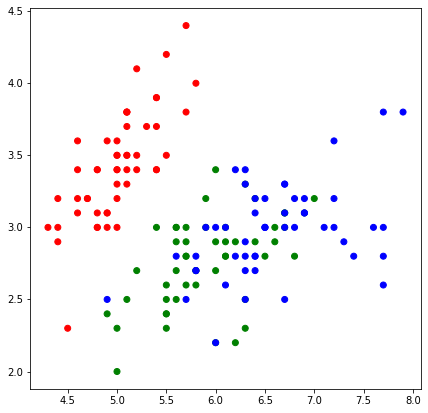

In [35]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

Используем евклидову метрику. Реализуем функцию для её подсчёта.

In [36]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

Реализуем алгоритм поиска k ближайших соседей.

### 1. К алгоритму kNN, реализованному на уроке, реализуйте добавление весов соседей по любому из показанных на уроке принципов.

In [37]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчёт расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаём словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k-элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            if d[0] == 0:
                classes[d[1]] += 1
                continue    
            
            classes[d[1]] += 1/d[0]

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])

    return answers

In [38]:
y_train

array([1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 0,
       2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0,
       1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 2, 2,
       1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0,
       2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 0,
       0, 2, 1, 2, 1, 2, 2, 1, 2, 0])

Напишем функцию для вычисления точности:

In [39]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

Проверим работу алгоритма при различных k:

In [40]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.667


Построим график распределения классов.

In [41]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчёт пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

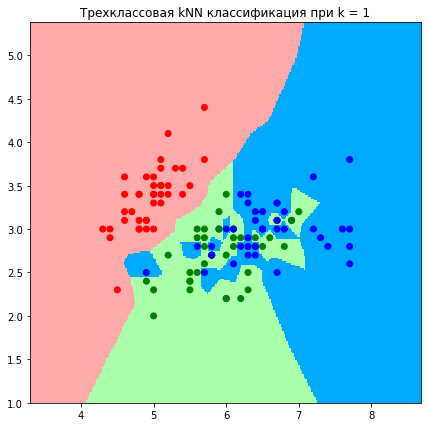

In [42]:
get_graph(X_train, y_train, k)

In [43]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.733


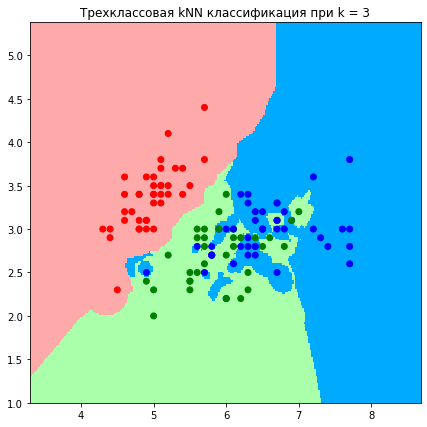

CPU times: user 18 s, sys: 114 ms, total: 18.1 s
Wall time: 17.7 s


In [44]:
%%time
get_graph(X_train, y_train, k)

In [45]:
%%time
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.833
CPU times: user 28.4 ms, sys: 1.56 ms, total: 29.9 ms
Wall time: 9.86 ms


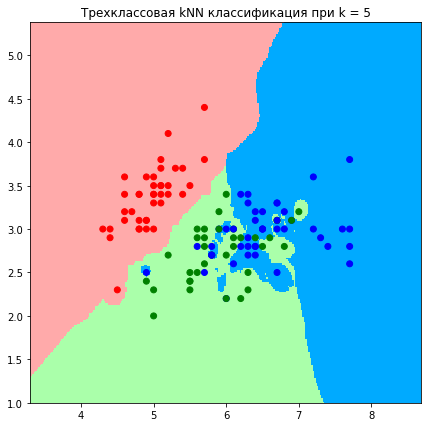

CPU times: user 18.2 s, sys: 125 ms, total: 18.3 s
Wall time: 17.9 s


In [46]:
%%time
get_graph(X_train, y_train, k)

In [47]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.867


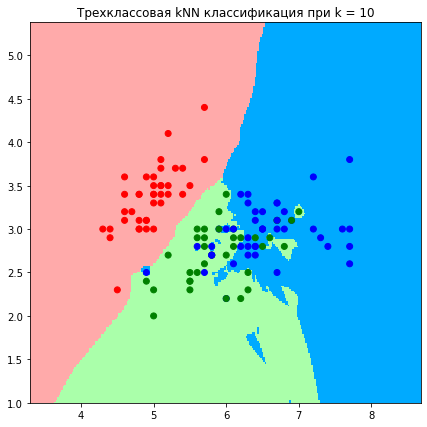

CPU times: user 18.2 s, sys: 139 ms, total: 18.3 s
Wall time: 17.9 s


In [48]:
%%time
get_graph(X_train, y_train, k)